<h2>Pipeline for Sentinnel2 data</h2>

In [17]:
import csv
import matplotlib.pyplot as plt
import matplotlib
import netCDF4 as nc
import rasterio
import numpy as np
parent_dir = '/home/cos-bot/Desktop/ai4boundaries'

<h2>Extracing train,val and test data using csv</h2>

In [18]:
#Paths of files to be extracted for CSV

train_img_path = []
train_mask_path =[]


val_img_path = []
val_mask_path = []

test_img_path = []
test_mask_path = []



def read_train_data(csv_path,label):
    train_list = []
    mask_list = []

    # Open the CSV file
    with open(csv_path, 'r') as file:
        reader = csv.DictReader(file)

        # Iterate over the rows
        for row in reader:
            split_value = row['split']

            # Check if the row belongs to the 'train' split
            if split_value == label:
                mask_value = row['sentinel2_masks_file_url']
                train_value = row['sentinel2_images_file_url']

                # Append the values to the respective lists

                # train_list.append(train_value)
                # mask_list.append(mask_value)

                mask_list.append(parent_dir+mask_value[67:])
                train_list.append(parent_dir+train_value[67:])


    # slice_strings_in_list(train_list)

    return train_list, mask_list

# Specify the CSV file path
csv_path = '/home/cos-bot/Desktop/ai4boundaries/ai4boundaries_ftp_urls_sentinel2_split.csv'

# Read the 'mask' and 'train' values for rows where 'split' is 'train'
train_img_path, train_mask_path = read_train_data(csv_path,'train')
val_img_path, val_mask_path = read_train_data(csv_path,'val')
test_img_path, test_mask_path = read_train_data(csv_path,'test')


# Print the train data lists
print("Train Data:")
print(len(train_img_path))
print(train_img_path[0])
print(len(train_mask_path))
print(train_mask_path[0])

# Print the val data lists 
print("Val Data:")
print(len(val_img_path))
print(val_img_path[0])
print(len(val_mask_path))
print(val_mask_path[0])


# Print the test data lists
print("Test Data:")
print(len(test_img_path))
print(test_img_path[0])
print(len(test_mask_path))
print(test_mask_path[0])

# print(parent_dir+train_data[0][53:])

# Print the test data lists
print("Mask Data:")
print(len(train_mask_path))
print(len(val_mask_path))
print(len(test_mask_path))

# /home/prateekjha/Anit/ai4boundaries/sentinel2/images/AT/AT_164_S2_10m_256.nc

Train Data:
5319
/home/cos-bot/Desktop/ai4boundaries/sentinel2/images/NL/NL_3141_S2_10m_256.nc
5319
/home/cos-bot/Desktop/ai4boundaries/sentinel2/masks/NL/NL_3141_S2label_10m_256.tif
Val Data:
1140
/home/cos-bot/Desktop/ai4boundaries/sentinel2/images/AT/AT_10191_S2_10m_256.nc
1140
/home/cos-bot/Desktop/ai4boundaries/sentinel2/masks/AT/AT_10191_S2label_10m_256.tif
Test Data:
1139
/home/cos-bot/Desktop/ai4boundaries/sentinel2/images/AT/AT_10038_S2_10m_256.nc
1139
/home/cos-bot/Desktop/ai4boundaries/sentinel2/masks/AT/AT_10038_S2label_10m_256.tif
Mask Data:
5319
1140
1139


<h2>Reading images and masks from train,test and val paths</h2>

In [3]:

img_path =train_img_path[0]
mask_path=train_mask_path[0]

X_test = []

print(img_path)
print(mask_path)

def create_np_4bands(dir_path,file_name):
    file_name=[]
    for img_path in dir_path:
        
        dataset = nc.Dataset(img_path)

        # Access the three bands
        band_B2 = dataset.variables['B2'][:][1]
        band_B3 = dataset.variables['B3'][:][1]
        band_B4 = dataset.variables['B4'][:][1]
        band_B8 = dataset.variables['B8'][:][1]


        # Normalize the bands (optional)
        normalized_B2 = (band_B2 - band_B2.min()) / (band_B2.max() - band_B2.min())
        normalized_B3 = (band_B3 - band_B3.min()) / (band_B3.max() - band_B3.min())
        normalized_B4 = (band_B4 - band_B4.min()) / (band_B4.max() - band_B4.min())
        normalized_B8 = (band_B8 - band_B8.min()) / (band_B8.max() - band_B8.min())

        # Stack the normalized bands
        stacked_image = np.dstack((normalized_B2, normalized_B3, normalized_B4,normalized_B8))
        file_name.append(stacked_image)
        
        return file_name



/home/cos-bot/Desktop/ai4boundaries/sentinel2/images/NL/NL_3141_S2_10m_256.nc
/home/cos-bot/Desktop/ai4boundaries/sentinel2/masks/NL/NL_3141_S2label_10m_256.tif


In [4]:
#Implementation 

X_train=[]
X_val=[]
X_test=[]

for img_path in train_img_path:
    
    dataset = nc.Dataset(img_path)

    # Access the three bands
    band_B2 = dataset.variables['B2'][:][1]
    band_B3 = dataset.variables['B3'][:][1]
    band_B4 = dataset.variables['B4'][:][1]
    band_B8 = dataset.variables['B8'][:][1]


    # Normalize the bands (optional)
    normalized_B2 = (band_B2 - band_B2.min()) / (band_B2.max() - band_B2.min())
    normalized_B3 = (band_B3 - band_B3.min()) / (band_B3.max() - band_B3.min())
    normalized_B4 = (band_B4 - band_B4.min()) / (band_B4.max() - band_B4.min())
    normalized_B8 = (band_B8 - band_B8.min()) / (band_B8.max() - band_B8.min())

    # Stack the normalized bands
    stacked_image = np.dstack((normalized_B2, normalized_B3, normalized_B4,normalized_B8))
    X_train.append(stacked_image)


# for img_path in val_img_path:
    
#     dataset = nc.Dataset(img_path)

#     # Access the three bands
#     band_B2 = dataset.variables['B2'][:][1]
#     band_B3 = dataset.variables['B3'][:][1]
#     band_B4 = dataset.variables['B4'][:][1]
#     band_B8 = dataset.variables['B8'][:][1]


#     # Normalize the bands (optional)
#     normalized_B2 = (band_B2 - band_B2.min()) / (band_B2.max() - band_B2.min())
#     normalized_B3 = (band_B3 - band_B3.min()) / (band_B3.max() - band_B3.min())
#     normalized_B4 = (band_B4 - band_B4.min()) / (band_B4.max() - band_B4.min())
#     normalized_B8 = (band_B8 - band_B8.min()) / (band_B8.max() - band_B8.min())

#     # Stack the normalized bands
#     stacked_image = np.dstack((normalized_B2, normalized_B3, normalized_B4,normalized_B8))
#     X_val.append(stacked_image)

# for img_path in test_img_path:
    
#     dataset = nc.Dataset(img_path)

#     # Access the three bands
#     band_B2 = dataset.variables['B2'][:][1]
#     band_B3 = dataset.variables['B3'][:][1]
#     band_B4 = dataset.variables['B4'][:][1]
#     band_B8 = dataset.variables['B8'][:][1]


#     # Normalize the bands (optional)
#     normalized_B2 = (band_B2 - band_B2.min()) / (band_B2.max() - band_B2.min())
#     normalized_B3 = (band_B3 - band_B3.min()) / (band_B3.max() - band_B3.min())
#     normalized_B4 = (band_B4 - band_B4.min()) / (band_B4.max() - band_B4.min())
#     normalized_B8 = (band_B8 - band_B8.min()) / (band_B8.max() - band_B8.min())

#     # Stack the normalized bands
#     stacked_image = np.dstack((normalized_B2, normalized_B3, normalized_B4,normalized_B8))
#     X_test.append(stacked_image)

In [7]:
img=X_train[0]

In [23]:
mask=train_mask_path[0]

Width: 256
Height: 256
Number of Bands: 4
CRS (Coordinate Reference System): EPSG:3035
Affine Transformation Matrix: | 10.00, 0.00, 4019472.81|
| 0.00,-10.00, 3326300.08|
| 0.00, 0.00, 1.00|
Data Type: float32


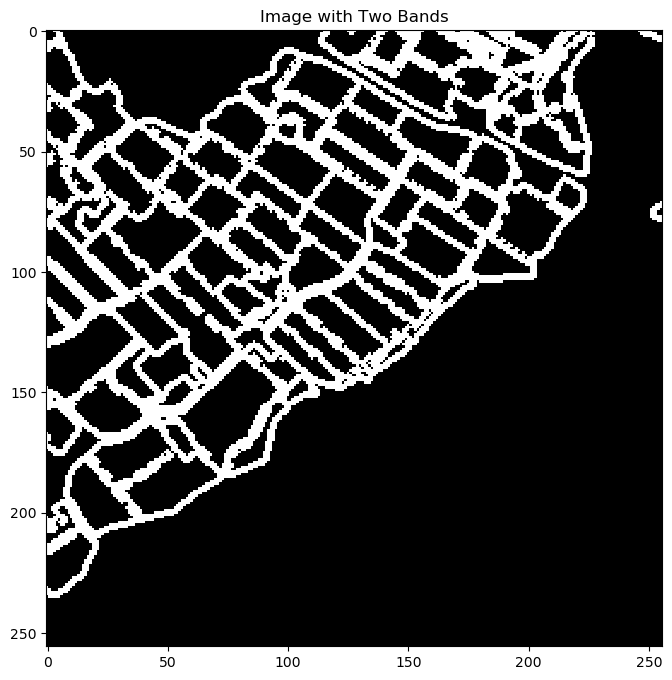

In [24]:
import rasterio
import matplotlib.pyplot as plt

# Specify the path to the TIFF file
# file_path = '/home/cos-bot/Desktop/ai4boundaries/sentinel2/masks/AT/AT_164_S2label_10m_256.tif'
file_path=mask

# Open the TIFF file
with rasterio.open(file_path) as src:
    # Read the metadata properties
    width = src.width
    height = src.height
    count = src.count  # Number of bands
    crs = src.crs
    transform = src.transform  # Affine transformation matrix
    dtype = src.dtypes[0]  # Data type of the pixel values
    band2 = src.read(2)

# Print the properties
print(f"Width: {width}")
print(f"Height: {height}")
print(f"Number of Bands: {count}")
print(f"CRS (Coordinate Reference System): {crs}")
print(f"Affine Transformation Matrix: {transform}")
print(f"Data Type: {dtype}")

plt.figure(figsize=(8, 8))
plt.imshow(band2, cmap='gray')  # Plot the first band
# plt.imshow(band2,cmap='gray')  # Plot the second band with transparency
plt.title('Image with Two Bands')
plt.show()

In [25]:
band2.shape

(256, 256)

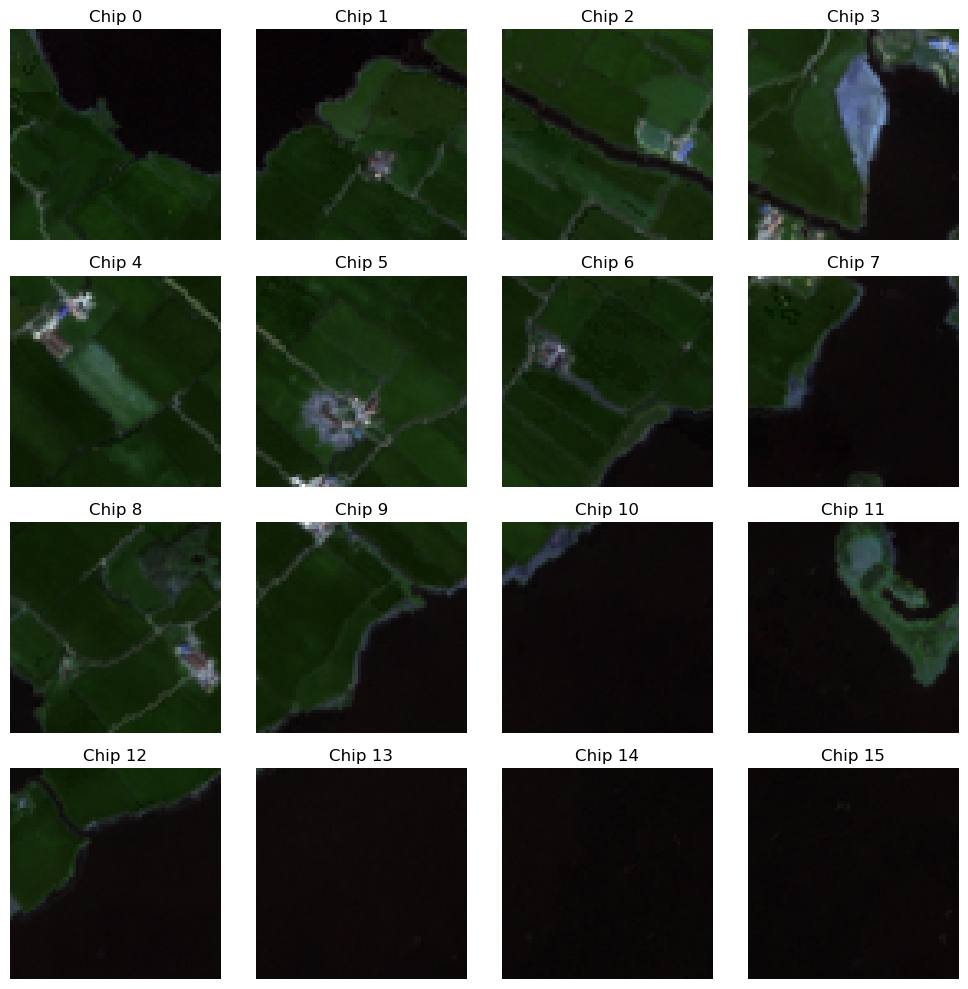

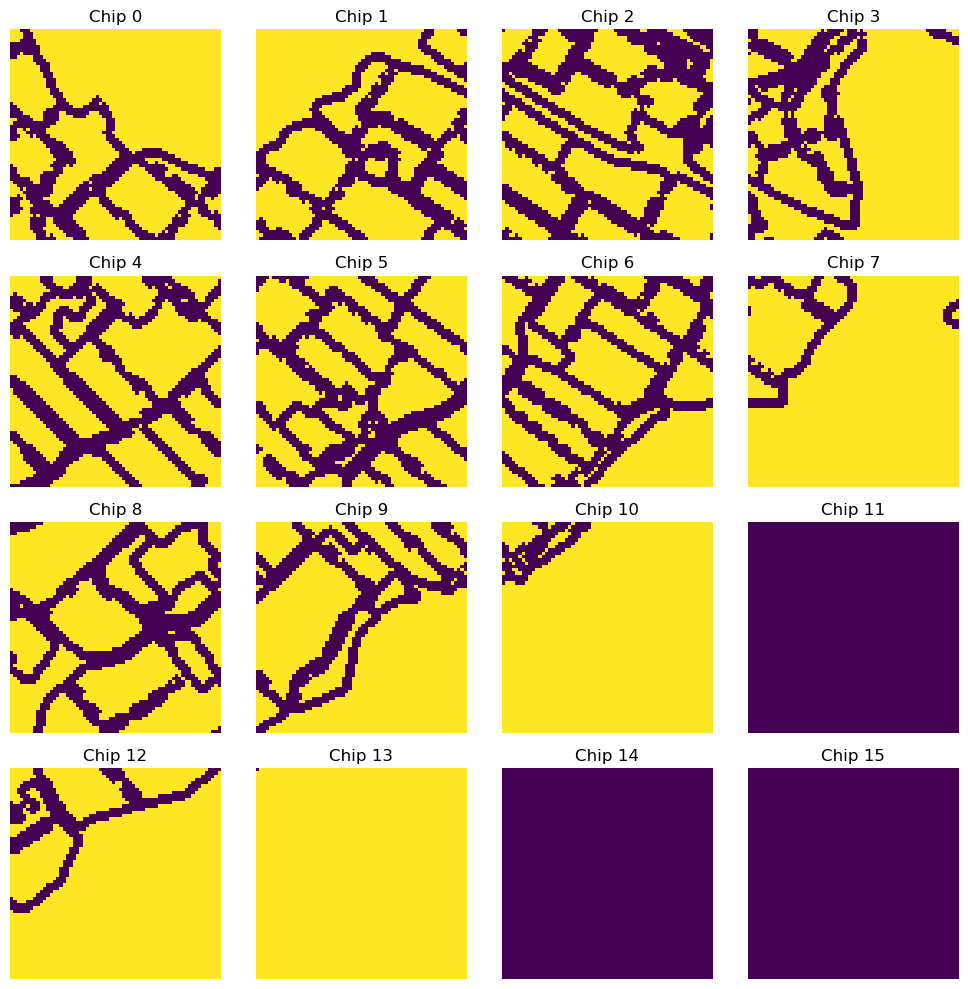

In [27]:
def split_image_into_chips(image, chip_size):
    height, width = image.shape[:2]
    chips = []

    for y in range(0, height, chip_size):
        for x in range(0, width, chip_size):
            chip = image[y:y+chip_size, x:x+chip_size]
            if chip.shape[:2] == (chip_size, chip_size):  # Ensure the chip is the desired size
                chips.append(chip)

    return chips

# Assuming 'image' is a loaded image as a numpy array

# Define the chip size
chip_size = 64  # You can change this to 64 for 64x64 chips

# Split the image into chips
chips = split_image_into_chips(img[:,:,:3], chip_size)
chips_mask = split_image_into_chips(1-band2, chip_size)

def plot_chips(chips):
    num_chips = len(chips)
    rows = int(num_chips**0.5)
    cols = (num_chips + rows - 1) // rows

    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

    for i, chip in enumerate(chips):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        ax.imshow(chip)
        ax.axis('off')
        ax.set_title(f'Chip {i}')

    # Remove empty subplots
    for i in range(num_chips, rows * cols):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        ax.axis('off')

    plt.tight_layout()
    plt.show()


# Plot the chips
plot_chips(chips)
plot_chips(chips_mask)


In [29]:
chips[0].shape

(64, 64, 3)

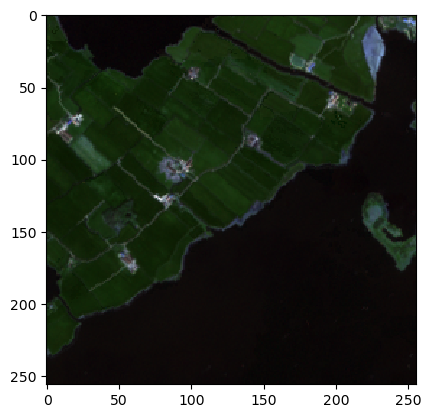

In [15]:
plt.imshow(img[:,:,:3])
plt.show()

In [6]:
#Print len of individual lists of data

print(len(X_train))
# print(len(X_val))
# print(len(X_test))

#Saving the 4band imgs of ai4boundaries

np.save('X_train4.npy',X_train)
# np.save('X_val4.npy',X_val)
# np.save('X_test4.npy',X_test)

X_train_load = np.load('X_train4.npy')
train_shape = X_train_load.shape

# X_val_load = np.load('X_val4.npy')
# val_shape= X_val_load.shape

# X_test_load = np.load('X_test4.npy')
# test_shape =X_test_load.shape

print(train_shape)
# print(val_shape)
# print(test_shape)



5319


OSError: Not enough free space to write 5577375744 bytes

In [ ]:
count=0

for train_img,val_img,test_img in zip(X_train,X_val,X_test):

    fig,axes = plt.subplots(1,3)
    axes[0].imshow(train_img[:,:,:3])
    axes[1].imshow(val_img[:,:,:3])
    axes[2].imshow(test_img[:,:,:3])
    plt.show()
    count+=1
    if(count>5):
        break
    